In [1]:
pip install -U scikit-learn wordcloud nltk



  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 535.5 kB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB

In [10]:
import re
import os
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize

def read_logs():
    log_entries = []
    directory = os.getcwd()  # Get the current working directory
    file_paths = glob.glob(os.path.join(directory, "*.jrn"))
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            log_entries.extend(lines)
    return log_entries

# Function to preprocess log entries
def preprocess_logs(log_entries):
    processed_logs = []
    for entry in log_entries:
        # Simplify whitespace and strip newlines
        entry = entry.strip().replace("\n", "")
        # Remove leading timestamps and operation codes
        entry = re.sub(r"^\s*\d{2}:\d{2}:\d{2}\s+\d+\s+", "", entry)
        # Remove special formatting characters and digits clustered as error codes or IDs
        entry = re.sub(r"\d{2,}", "", entry)  # removes long sequences of digits
        entry = re.sub(r"[<>{}()\[\]]", "", entry)  # removes special characters
        # Tokenize the entry into words
        words = word_tokenize(entry)
        # Filter out non-readable words (e.g., punctuation, numbers)
        readable_words = [word for word in words if word.isalpha() and len(word) > 4]
        # Reconstruct the entry from readable words
        processed_entry = " ".join(readable_words)
        processed_logs.append(processed_entry)
    return processed_logs
nltk.download('punkt')
log_entries= read_logs()

print(len(log_entries))
# Preprocess the log entries
processed_entries = preprocess_logs(log_entries)

# Instantiate the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(4, 4))

# Fit and transform the preprocessed log entries
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_entries)

# Display the TF-IDF matrix
#print(tfidf_matrix.toarray())

# Display the feature names corresponding to the columns in the TF-IDF matrix
print(tfidf_vectorizer.get_feature_names_out())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1156474
['accept deposits unable transaction' 'accept multiples cancel management'
 'accept press cancel cancel' 'account correct number receipt'
 'account deposit press checking' 'account include addition charged'
 'account inquiry press checking' 'account statement press checking'
 'account transfer funds press' 'account vegas account account'
 'account vegas debit account' 'account withdraw funds press'
 'addition charged continue print' 'addition charged continue select'
 'addition charged financial institution'
 'addition requested addition charged' 'adjust volume terminal press'
 'adjustment cancel denomination cancel'
 'agencia institucion financiera obtener' 'agent money retract counter'
 'agent paper state unknown' 'agent reactivate devices cccardfw'
 'agent reactivate devices cccdmfw' 'agent reactivate devices result'
 'agent retain counter initial' 'agent retainbin state unknown'
 'agent retractbin state unknown' 'agent toner state unknown'
 'agreed currency conversion provi

In [12]:
#tfidf_matrix
tfidf_vectorizer.get_feature_names_out()

array(['accept deposits unable transaction',
       'accept multiples cancel management', 'accept press cancel cancel',
       'account correct number receipt', 'account deposit press checking',
       'account include addition charged',
       'account inquiry press checking',
       'account statement press checking', 'account transfer funds press',
       'account vegas account account', 'account vegas debit account',
       'account withdraw funds press', 'addition charged continue print',
       'addition charged continue select',
       'addition charged financial institution',
       'addition requested addition charged',
       'adjust volume terminal press',
       'adjustment cancel denomination cancel',
       'agencia institucion financiera obtener',
       'agent money retract counter', 'agent paper state unknown',
       'agent reactivate devices cccardfw',
       'agent reactivate devices cccdmfw',
       'agent reactivate devices result', 'agent retain counter initial',

In [16]:
# Compute mean TF-IDF score for each term
mean_tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]
terms = tfidf_vectorizer.get_feature_names_out()

# Sort terms based on their TF-IDF scores in ascending order
sorted_terms_by_tfidf = sorted(zip(terms, mean_tfidf_scores), key=lambda x: x[1])

# Calculate percentile values
total_terms = len(sorted_terms_by_tfidf)
percentile_80 = int(total_terms * 0.80)
percentile_100 = int(total_terms *  1)

# Get terms within the 80th to 100th percentile range
terms_in_percentile_range = sorted_terms_by_tfidf[percentile_80:percentile_100]

# Print the terms within the specified percentile range
print("Terms within the 80th to 100th percentile range of TF-IDF scores:")
for term, score in terms_in_percentile_range:
    if 'close' in term.lower():
        print(f"{term}: {score}")
    if 'error' in term.lower():
         print(f"{term}: {score}")
    

Terms within the 80th to 100th percentile range of TF-IDF scores:
error error management successfully: 5.992046907780176e-05
error management successfully started: 5.992046907780176e-05
command returning state closed: 8.162841500736167e-05
application error management ready: 8.474034003358495e-05
error detailed failure information: 8.474034003358495e-05
error ccguiagent successfully started: 8.560503738086643e-05
error cclogicalagent successfully started: 8.560503738086643e-05
error ccprinteragent successfully started: 9.079322146455531e-05
error ccscanneragent successfully started: 9.079322146455531e-05
error ccselagent successfully started: 9.079322146455531e-05
error ccttsagent successfully started: 9.079322146455531e-05
errornr class insert ddcstatus: 9.869000644359553e-05
application starting error management: 9.94401949373701e-05
error cccardagent successfully started: 9.94401949373701e-05
error cccashoutagent successfully started: 9.94401949373701e-05
error cceppagent successful

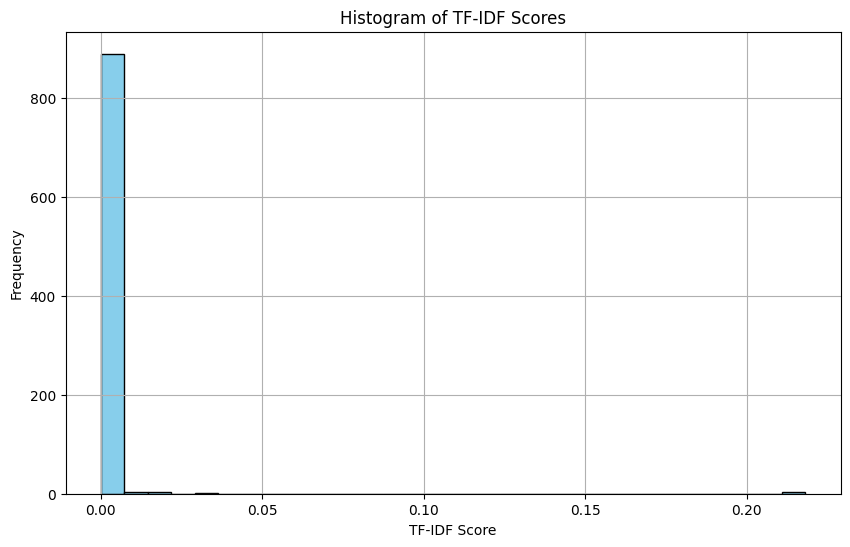

In [17]:
import matplotlib.pyplot as plt

# Assuming you have already computed mean_tfidf_scores and terms
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(mean_tfidf_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


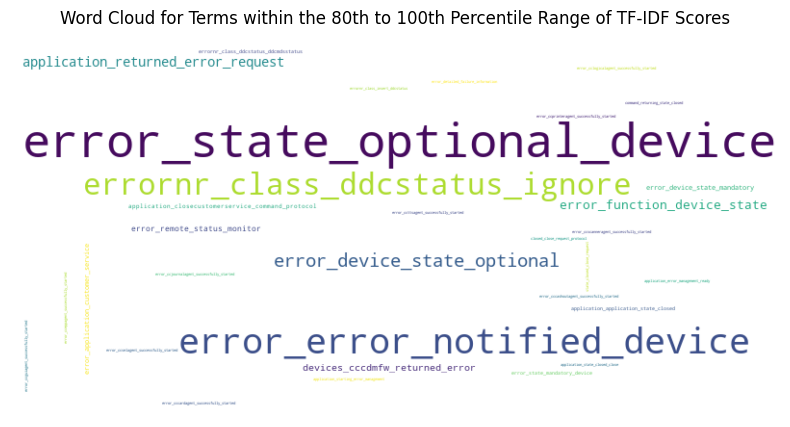

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate terms using underscores
cleaned_terms = [(term[0].replace(' ', '_'), term[1]) for term in terms_in_percentile_range if 'error' in term[0] or 'close' in term[0]]





# Create a dictionary of terms and their TF-IDF scores
terms_scores_dict = {term: score for term, score in cleaned_terms}

# Generate word cloud using TF-IDF scores as frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white',max_font_size=150).generate_from_frequencies(terms_scores_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Terms within the 80th to 100th Percentile Range of TF-IDF Scores')
plt.show()


In [95]:
cleaned_terms

[('error error management start', 4.972009746868505e-05),
 ('error management start automatic', 4.972009746868505e-05),
 ('error error management successfully', 5.992046907780176e-05),
 ('error management successfully started', 5.992046907780176e-05),
 ('application error management ready', 8.474034003358495e-05),
 ('error detailed failure information', 8.474034003358495e-05),
 ('error ccguiagent successfully started', 8.560503738086643e-05),
 ('error cclogicalagent successfully started', 8.560503738086643e-05),
 ('error ccprinteragent successfully started', 9.079322146455531e-05),
 ('error ccscanneragent successfully started', 9.079322146455531e-05),
 ('error ccselagent successfully started', 9.079322146455531e-05),
 ('error ccttsagent successfully started', 9.079322146455531e-05),
 ('errornr class insert ddcstatus', 9.869000644359553e-05),
 ('application starting error management', 9.94401949373701e-05),
 ('error cccardagent successfully started', 9.94401949373701e-05),
 ('error ccca